In [64]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
#For showing plots directly in the notebook:
%matplotlib inline

df = pd.read_csv('analytics.csv')

In [65]:
df.head(2)

,Unnamed: 0,available_bike_stands,available_bikes,bike_stands,last_update,number,status,latest_weather,clouds,conditions,date,description,sunrise,sunset,temperature,wind
0,0,4,27,31,1521126715000,1,OPEN,1521124200,40,Clouds,1521124200,scattered clouds,1521095903,1521138611,10.52,8.7
1,1,1,30,31,1521127532000,1,OPEN,1521124200,40,Clouds,1521124200,scattered clouds,1521095903,1521138611,10.52,8.7


In [66]:
df['last_update_date'] = pd.to_datetime(df.last_update, unit='ms')
df.set_index('last_update_date', inplace=True)
df['available_bike_stands'].head()

last_update_date
2018-03-15 15:11:55     4
2018-03-15 15:25:32     1
2018-03-15 15:08:43    20
2018-03-15 15:18:51    20
2018-03-15 15:11:13    18
Name: available_bike_stands, dtype: int64

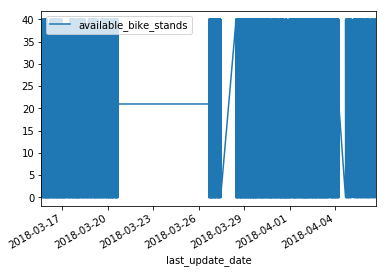

In [67]:
df.plot(y='available_bike_stands')

/home/orla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


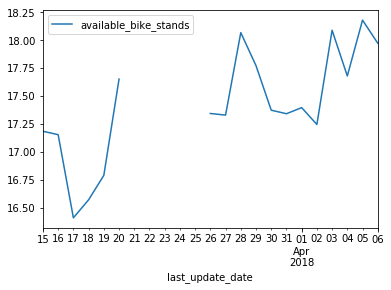

In [68]:
df.resample('1D').plot(y='available_bike_stands')

/home/orla/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  """Entry point for launching an IPython kernel.


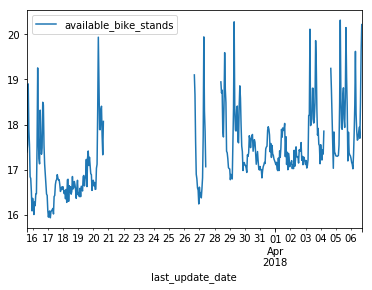

In [69]:
df.resample('1H').plot(y='available_bike_stands')

In [61]:
df_resamp = df['available_bike_stands'].resample('1d').mean()
df_resamp 

last_update_date
2018-03-15    17.184423
2018-03-16    17.153638
2018-03-17    16.410094
2018-03-18    16.571157
2018-03-19    16.789900
2018-03-20    17.651071
2018-03-21          NaN
2018-03-22          NaN
2018-03-23          NaN
2018-03-24          NaN
2018-03-25          NaN
2018-03-26    17.343312
2018-03-27    17.328807
2018-03-28    18.066599
2018-03-29    17.770964
2018-03-30    17.372683
2018-03-31    17.341011
2018-04-01    17.395603
2018-04-02    17.245078
2018-04-03    18.087749
2018-04-04    17.678868
2018-04-05    18.178184
2018-04-06    17.972171
Freq: D, Name: available_bike_stands, dtype: float64

In [62]:
list(zip(map(lambda x: x.isoformat(), df_resamp.index), df_resamp.values))

[('2018-03-15T00:00:00', 17.18442280945758),
 ('2018-03-16T00:00:00', 17.15363784076548),
 ('2018-03-17T00:00:00', 16.410093683892416),
 ('2018-03-18T00:00:00', 16.57115730561663),
 ('2018-03-19T00:00:00', 16.789900307462965),
 ('2018-03-20T00:00:00', 17.651071272409268),
 ('2018-03-21T00:00:00', nan),
 ('2018-03-22T00:00:00', nan),
 ('2018-03-23T00:00:00', nan),
 ('2018-03-24T00:00:00', nan),
 ('2018-03-25T00:00:00', nan),
 ('2018-03-26T00:00:00', 17.343311950582088),
 ('2018-03-27T00:00:00', 17.328806654218297),
 ('2018-03-28T00:00:00', 18.066598659283009),
 ('2018-03-29T00:00:00', 17.770964449736351),
 ('2018-03-30T00:00:00', 17.372683180322191),
 ('2018-03-31T00:00:00', 17.341011384696849),
 ('2018-04-01T00:00:00', 17.395603417586329),
 ('2018-04-02T00:00:00', 17.245077951002227),
 ('2018-04-03T00:00:00', 18.087749236572659),
 ('2018-04-04T00:00:00', 17.678867924528301),
 ('2018-04-05T00:00:00', 18.178183816458304),
 ('2018-04-06T00:00:00', 17.972170686456401)]

In [8]:
sorted(pd.unique(graph_df.description).ravel())



['broken clouds',
 'clear sky',
 'few clouds',
 'fog',
 'light intensity drizzle',
 'light intensity drizzle rain',
 'light intensity shower rain',
 'light rain',
 'light shower snow',
 'light snow',
 'mist',
 'moderate rain',
 'scattered clouds',
 'shower rain',
 'shower sleet',
 'shower snow']

In [19]:
df_rain = graph_df[(graph_df['description']=='moderate rain')  ]
# df_rain
df_not_rain = graph_df[(graph_df['description']!='moderate rain')  ]
# df_rain
print(df_rain.shape[0]+df_not_rain.shape[0],graph_df.shape[0])


155900 155900


In [71]:
print(df.shape[1])

16


In [128]:
def make_availability_list(df):    
    numbers = df['number'].unique()   #create list of unique station numbers
    bikes_by_station_by_hour = {}    #will store avg available_bikes for each station by hour of day
    for i in numbers:
        bikes_by_station_by_hour[i]=[]

#     bikes_by_station_by_hour[2]
    hours = [i for i in range(24)]   #create list of 24 hours
    print(hours)      #sort hours
    for i in hours:    #iterate over hours
        hour = df[df['hours']==i]    #for each hour create data frame with only that hour to calculate avg for that hour
#         print(hour)
        temp = hour.copy()
        for j in numbers:    #iterate over unique station numbers
            
            hour = temp[(temp['number']==j)]
#             print(hour)
            if hour.shape[0]>0:
                avg_available_bikes = hour.groupby(['number'])['available_bikes'].mean()[j]    #get mean available_bikes for station j
                bikes_by_station_by_hour[j].append(avg_available_bikes)
    #           bikes_by_station_by_hour[j].append(i)
            else:
                bikes_by_station_by_hour[j].append(0)
            
      #  print('loop')
    return bikes_by_station_by_hour

rain_list= make_availability_list(df_rain)
no_rain_list= make_availability_list(df_not_rain )
# print(l1,l2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [129]:
rain_list

{1: [6,
  0,
  0,
  15,
  7.333333333333333,
  6.5,
  0,
  30.199999999999999,
  30.5,
  31,
  0,
  0,
  17,
  12,
  11.4,
  14.5,
  0,
  0,
  30,
  30.5,
  4,
  4,
  12,
  6],
 2: [6,
  0,
  0,
  6,
  13.166666666666666,
  15.5,
  0,
  3.3999999999999999,
  0,
  2.3333333333333335,
  0,
  0,
  1,
  0.66666666666666663,
  0,
  0.5,
  0,
  0,
  7,
  6,
  4.5,
  4,
  7,
  6],
 3: [8,
  0,
  0,
  4,
  7.625,
  8,
  0,
  0.59999999999999998,
  1,
  0.66666666666666663,
  0,
  0,
  1,
  1.3333333333333333,
  0.75,
  0,
  0,
  0,
  2,
  2.5,
  6,
  7,
  7,
  8],
 4: [1,
  0,
  0,
  6,
  5.5714285714285712,
  6,
  0,
  0.75,
  7,
  7.333333333333333,
  0,
  0,
  1,
  0.5,
  2,
  2,
  0,
  0,
  1,
  1.5,
  1,
  1.5,
  3,
  1],
 5: [22,
  0,
  0,
  26,
  31.5,
  34,
  0,
  1.5,
  7.5,
  4,
  0,
  0,
  26,
  24.666666666666668,
  25.25,
  25,
  0,
  0,
  4,
  10,
  26,
  27,
  19,
  22],
 6: [1,
  0,
  0,
  16,
  8,
  1,
  0,
  4.25,
  3,
  2.3333333333333335,
  0,
  0,
  18,
  19.5,
  19.399999

In [142]:
station_rain=rain_list[4]
station_no_rain=no_rain_list[4]
print(station_rain)
hours = [i for i in range(24)]

[1, 0, 0, 6, 5.5714285714285712, 6, 0, 0.75, 7, 7.333333333333333, 0, 0, 1, 0.5, 2, 2, 0, 0, 1, 1.5, 1, 1.5, 3, 1]


In [143]:
df = pd.DataFrame(data ={'hour':hours,'rain':station_rain,'not rain':station_no_rain})

In [144]:
group = df.groupby('hour')

      not rain      rain
hour                    
0     2.828571  1.000000
1     2.619718  0.000000
2     3.030769  0.000000
3     2.740741  6.000000
4     2.533333  5.571429
5     3.044776  6.000000
6     2.750000  0.000000
7     2.689655  0.750000
8     2.600000  7.000000
9     2.685185  7.333333
10    3.086207  0.000000
11    2.400000  0.000000
12    2.229508  1.000000
13    3.101695  0.500000
14    2.690909  2.000000
15    2.229508  2.000000
16    2.309859  0.000000
17    2.676923  0.000000
18    2.800000  1.000000
19    3.261538  1.500000
20    3.322581  1.000000
21    3.338710  1.500000
22    3.542373  3.000000
23    3.323077  1.000000


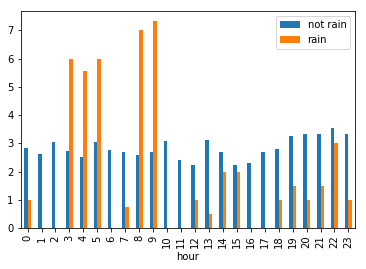

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
avg = group.sum()
print(avg)
avg.plot(kind='bar')


In [36]:
date_time_object  = '2018-04-21 18:00:00'
date_time_list=date_time_object.split(' ')
print(date_time_list) 
date=date_time_list[0].split()
date_seperated = date[0].split('-')
year = date_seperated[0]
month = date_seperated[1]
day = date_seperated[2]
print(year,month,day )
hour_list= date_time_list[1].split(':')

print(date)
print(date_seperated)
print(hour_list)
hour_of_day= hour_list[0]
print(hour_of_day)
date_list=date[0].split('-')
# hour=z[1].split(':')
# print(hour[1])
# print(a)
import datetime
myObj = datetime.datetime(int(year),int(month),int(day),int(hour_of_day))
print('Day of week',myObj.weekday())

['2018-04-21', '18:00:00']
2018 04 21
['2018-04-21']
['2018', '04', '21']
['18', '00', '00']
18
Day of week 5
